# Loading Data

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np

In [2]:
#Reading File
data=pd.read_csv("survey_results_public.csv")

# Basic Exploration

In [3]:
#First 5 rows
data.head(2)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult


# ETL Questions

### Find the average age of developers when they wrote their first line of code.

In [4]:
#changing the data type to string
data["Age1stCode"]=data["Age1stCode"].astype(str)

In [5]:
#Definig a function to filter out strings
def age(row):
    for value in row.split():
        if value.isdigit():
            return value
        else:
            return 0

In [6]:
data["Age1stCode"] = data["Age1stCode"].apply(lambda row: age(row))

In [7]:
#Changing Data types
data["Age1stCode"] = pd.to_numeric(data["Age1stCode"], downcast="float")

In [8]:
#re checking data type 
data["Age1stCode"].dtype

dtype('float32')

In [9]:
#findng the avg
avg_age_of_first_line_of_code = data["Age1stCode"].mean()

#printing the result
print("Average age of developers when they wrote their first line of code", round(avg_age_of_first_line_of_code, 2))

Average age of developers when they wrote their first line of code 15.14


### Deduce the percentage of developers who knew python in each country

In [10]:
#creating a new column from languages worked with
data['Language'] = data["LanguageWorkedWith"].str.split(";")

In [11]:
#dropping the languages column
data=data.drop(['LanguageWorkedWith'], axis=1)

In [12]:
#Filling the NaN values with value "Others"
data['Language']=data['Language'].replace(np.nan, "Others")

In [13]:
#defining a function to see if Python is present in the Lannguage column or not
def python(row):
    if "Python" in row:
        return 'Yes'
    else:
        return 'No'

In [14]:
#Applying the above defined function
data["Python"]= data["Language"].apply (lambda row: python(row))

In [15]:
#Filtering out developers who know Python
data_python = data[data["MainBranch"]== "I am a developer by profession"]

In [16]:
#respondants who are developers 
developers = data_python[["Country", "Python"]]
developer_worked_with_python = developers[developers["Python"]=="Yes"]

In [17]:
#grouping developers by country
developers = developers.groupby(["Country"]).count()

In [18]:
#grouping developers who worked with python by country
developer_worked_with_python = developer_worked_with_python.groupby(["Country"]).count()

In [19]:
#percentage of developers who knew python in each country
percent_of_developers_in_each_country = developer_worked_with_python/developers*100

In [20]:
#result
percent_of_developers_in_each_country

,Python
Country,
Afghanistan,4.000000
Albania,23.880597
Algeria,32.142857
Andorra,NaN
Angola,50.000000
...,...
"Venezuela, Bolivarian Republic of...",26.666667
Viet Nam,33.576642
Yemen,30.000000


### Generate the report for the average salary of developers based on the continent.

In [21]:
#changing data type to string
data["Country"]=data['Country'].astype('str')

In [22]:
#filtering out oulier behavior
data = data[data["Country"]!= 'Other Country (Not Listed Above)']

In [23]:
# Add Continent Column 
continent=pd.read_csv("countryContinent.csv")
data = data.merge(continent, how ="left", on=["Country"])

In [24]:
#filtering out developers
data_developers=data[data["MainBranch"]== "I am a developer by profession"]

In [25]:
#selecting salary and continent columns
data_developers= data_developers[['ConvertedComp', 'Continent']]

In [26]:
#grouping based on continent with average salary
avg_salary=data_developers.groupby(['Continent']).mean()

In [27]:
#renaming column
avg_salary=avg_salary.rename(columns={'ConvertedComp':'Avg_Salary_in USD'})

In [28]:
#result
avg_salary

,Avg_Salary_in USD
Continent,
Africa,34818.760538
Asia,36613.710443
Europe,99779.188906
North America,227745.883865
Oceania,167614.534447
South America,33338.938628


### Based on this survey, what will be the most desired programming language for the year 2020?

In [29]:
#converting the list of values in Langauge column to individual rows
data_pgrm = data.explode('Language')

<AxesSubplot:>

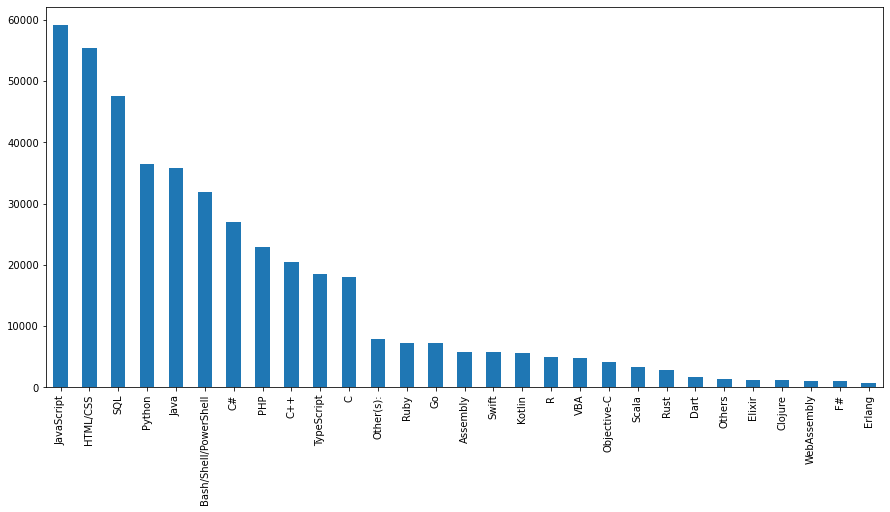

In [30]:
#ploting a barplot of the counts of each language
data_pgrm['Language'].value_counts().plot(kind="bar", figsize=(15,7))

### Generate the report for the people who code as a hobby based on their gender and continent.

In [31]:
#defining a function
def gender(row):
    if row == "Man":
        return "Man"
    if row == "Woman":
        return "Woman"
    else:
        return "Others"

In [32]:
#applying the function to gender column
data["Gender"]=data["Gender"].apply(gender)

In [33]:
#filtering out respondants who do coding as a hobby
data_hobby=data[data["Hobbyist"]=='Yes']

In [34]:
#grouping data based on continent and gender
continent_gender=data.groupby(["Continent","Gender"]).agg({'Hobbyist':'count'})

#grouping data of repondents who do coding as hobby based on continent and gender
continent_gender_hobby=data_hobby.groupby(["Continent","Gender"]).agg({'Hobbyist':'count'})

In [35]:
# Percentage of respondents with Coding as Hobby By continent and Gender
percentage_of_respondents_with_coding_hobby_per_continent = (continent_gender_hobby/continent_gender)*100

#result
percentage_of_respondents_with_coding_hobby_per_continent

Hobbyist
Continent     Gender           
Africa        Man     79.905741
              Others  81.538462
              Woman   64.397906
Asia          Man     79.101597
              Others  77.860327
              Woman   65.024233
Europe        Man     83.275058
              Others  83.271923
              Woman   64.813039
North America Man     82.162312
              Others  80.190058
              Woman   61.485390
Oceania       Man     83.333333
              Others  86.923077
              Woman   69.444444
South America Man     76.626658
              Others  73.863636
              Woman   59.444444

### Generate the report for job and career satisfaction of developers based on their gender and continent.

In [36]:
#filtering out developers
data_job_career_sat = data[data["MainBranch"] == "I am a developer by profession"]

In [37]:
#selecting required columns form data
data_job_career_sat = data_job_career_sat[['JobSat', "CareerSat", "Gender", "Continent"]]

In [38]:
#grouping data based on continent and gender
job_career_sat = data_job_career_sat.groupby(["Continent","Gender"])

In [39]:
#result
job_career_sat.describe()

JobSat                                  CareerSat         \
                      count unique                 top  freq     count unique   
Continent     Gender                                                            
Africa        Man      1333      5  Slightly satisfied   460      1453      5   
              Others     52      5      Very satisfied    16        62      5   
              Woman     104      5  Slightly satisfied    27       108      5   
Asia          Man     12076      5  Slightly satisfied  4246     12401      5   
              Others    759      5  Slightly satisfied   231       871      5   
              Woman     761      5  Slightly satisfied   257       791      5   
Europe        Man     22780      5  Slightly satisfied  8185     23093      5   
              Others    819      5      Very satisfied   280       865      5   
              Woman    1419      5      Very satisfied   489      1449      5   
North America Man     16346      5      Very satisfied  6523     16669      5   
              Others    914      5      Very satisfied   315       974      5   
              Woman    1676      5      Very satisfied   755      1726      5   
Oceania       Man      1617      5      Very satisfied   582      1643      5   
              Others     67      5      Very satisfied    21        76      5   
              Woman     104      5      Very satisfied    39       106      5   
South America Man      2395      5  Slightly satisfied   799      2457      5   
              Others     51      5  Slightly satisfied    20        55      5   
              Woman     127      5  Slightly satisfied    44       135      5   

                                                
                                     top  freq  
Continent     Gender                            
Africa        Man         Very satisfied   525  
              Others      Very satisfied    18  
              Woman       Very satisfied    38  
Asia          Man     Slightly satisfied  4318  
              Others      Very satisfied   268  
              Woman   Slightly satisfied   269  
Europe        Man         Very satisfied  8937  
              Others  Slightly satisfied   319  
              Woman       Very satisfied   583  
North America Man         Very satisfied  8739  
              Others      Very satisfied   418  
              Woman       Very satisfied   877  
Oceania       Man         Very satisfied   733  
              Others      Very satisfied    27  
              Woman   Slightly satisfied    43  
South America Man         Very satisfied   872  
              Others  Slightly satisfied    20  
              Woman   Slightly satisfied    47